#### In this section, you’ll use Python and SQLAlchemy to do a basic climate analysis and data exploration of your climate database. Specifically, you’ll use SQLAlchemy ORM queries, Pandas, and Matplotlib. To do so, complete the following steps:

####  1.Note that you’ll use the provided files climate_starter.ipynb and hawaii.sqlite to complete your climate analysis and data exploration.

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

####  2. Use the SQLAlchemy create_engine() function to connect to your SQLite database.

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#### 3. Use the SQLAlchemy automap_base() function to reflect your tables into classes, and then save references to the classes named station and measurement.

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

####  4. Link Python to the database by creating a SQLAlchemy session.

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [10]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


#### 5. Perform a precipitation analysis and then a station analysis by completing the steps in the following two subsections.

# Exploratory Precipitation Analysis

##### 1. Find the most recent date in the data set.

In [12]:
# Find the most recent date in the data set.
# Design a query to determine the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set is: {most_recent_date[0]}")

The most recent date in the data set is: 2017-08-23


#### 2 Using that date, get the previous 12 months of precipitation data by querying the previous 12 months of data.

In [13]:
# Calculate the date one year from the last date in data set
one_year_ago = dt.datetime.strptime(most_recent_date[0], "%Y-%m-%d") - dt.timedelta(days=365)


In [14]:
# extra check on one year ago
# Convert the datetime object to a date string in the desired format 'YYYY-MM-DD'
one_year_ago_formatted = one_year_ago.strftime("%Y-%m-%d")
print(f"One year before the most recent date: {one_year_ago_formatted}")


One year before the most recent date: 2016-08-23


#### 3. Select only the "date" and "prcp" values.

In [15]:

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
query_result = session.query(*sel).filter(Measurement.date >= one_year_ago).all()



#### 4.Load the query results into a Pandas DataFrame. Explicitly set the column names.

In [16]:

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(query_result, columns=['date', 'precipitation'])
precipitation_df.set_index('date', inplace=True)



#### 5. Sort the DataFrame values by "date".

In [17]:
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_index()

#### 6. Plot the results by using the DataFrame plot method, as the following image shows:

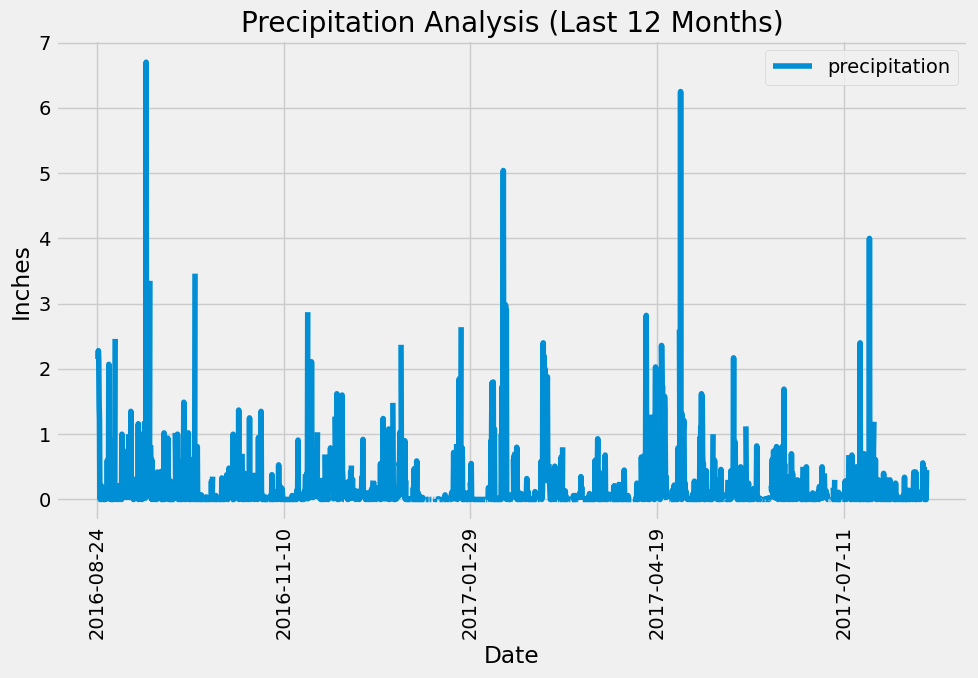

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(10, 7))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Analysis (Last 12 Months)')




plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.tight_layout()


# show the plot
plt.show()

#### 7. Use Pandas to print the summary statistics for the precipitation data.

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = precipitation_df.describe()
print(precipitation_summary)

       precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

#### Design a query to calculate the total number of stations in the dataset


In [20]:
# Calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(f"The total number of stations in the dataset is: {total_stations}")

The total number of stations in the dataset is: 9


#### Design a query to find the most-active stations (that is, the stations that have the most rows) 
#### List the stations and observation counts in descending order.
    

In [30]:
# List the stations and their counts in descending order.
# Query to find the number of observations for each station
station_counts = (session
                  .query(Measurement.station, func.count(Measurement.station))
                  .group_by(Measurement.station)
                  .order_by(func.count(Measurement.station).desc())
                  .all())



In [31]:
# Get the most active station
most_active_station_id = station_counts[0][0]
print(f"The station ID with the greatest number of observations is: {most_active_station_id} with {station_counts[0][1]}. ")

The station ID with the greatest number of observations is: USC00519281 with 2772. 


In [27]:
# Print the list of stations and their counts in descending order
for station, count in station_counts:
    print(f"Station {station} has {count} observations")

Station USC00519281 has 2772 observations
Station USC00519397 has 2724 observations
Station USC00513117 has 2709 observations
Station USC00519523 has 2669 observations
Station USC00516128 has 2612 observations
Station USC00514830 has 2202 observations
Station USC00511918 has 1979 observations
Station USC00517948 has 1372 observations
Station USC00518838 has 511 observations


#### Answer the following question: which station id has the greatest number of observations?

In [22]:
# Get the most active station
most_active_station_id = station_counts[0][0]
print(f"The station ID with the greatest number of observations is: {most_active_station_id} with {station_counts[0][1]}. ")

The station ID with the greatest number of observations is: USC00519281 with 2772. 


In [22]:
# Get the most active station
most_active_station_id = station_counts[0][0]
print(f"The station ID with the greatest number of observations is: {most_active_station_id} with {station_counts[0][1]}. ")

The station ID with the greatest number of observations is: USC00519281 with 2772. 


#### Design a query to get the previous 12 months of temperature observation (TOBS) data. To do so, complete the following steps:

###### Filter by the station that has the greatest number of observations.

###### Query the previous 12 months of TOBS data for that station.

###### Plot the results as a histogram with bins=12, as the following image shows:

In [23]:
 # get the ID of the most active station
most_active_station = station_counts[0][0] 

# Query to find the lowest temperature, highest temperature, and average temperature for the most active station
temps = (session
         .query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
         .filter(Measurement.station == most_active_station)
         .all())

# Unpack the result and print out the summary statistics
lowest_temp, highest_temp, average_temp = temps[0]
print(f"For station {most_active_station}:")
print(f" - Lowest temperature: {lowest_temp} F")
print(f" - Highest temperature: {highest_temp} F")
print(f" - Average temperature: {average_temp:.1f} F")

For station USC00519281:
 - Lowest temperature: 54.0 F
 - Highest temperature: 85.0 F
 - Average temperature: 71.7 F


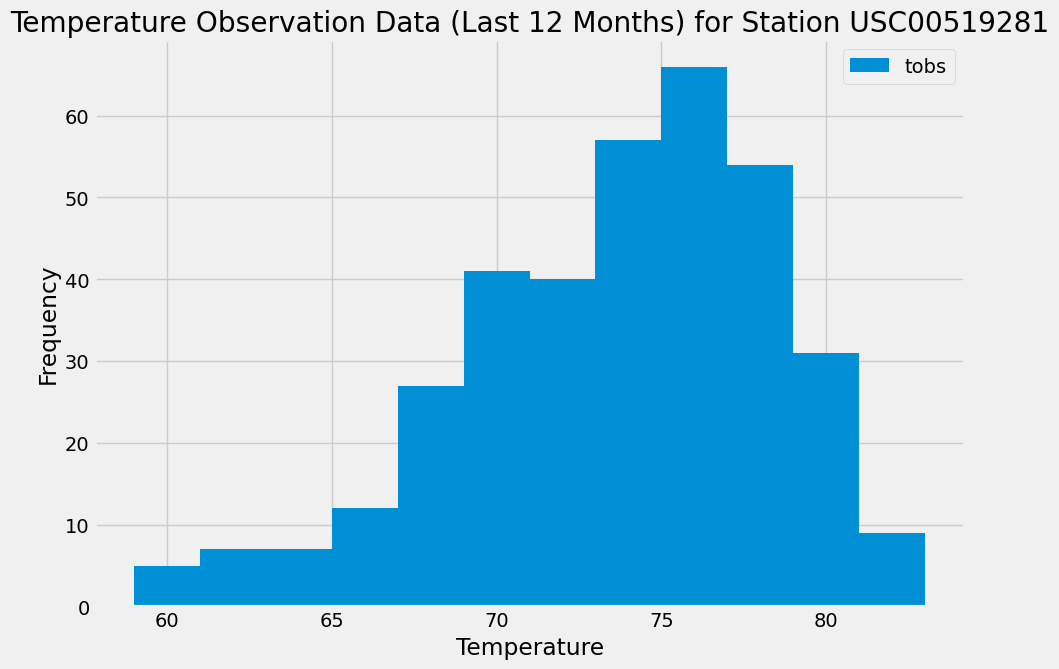

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Find the most recent date for the most active station
most_recent_date_active_station = (session
                                   .query(Measurement.date)
                                   .filter(Measurement.station == most_active_station)
                                   .order_by(Measurement.date.desc())
                                   .first())[0]

# Calculate the date one year from the most recent date in data set
one_year_ago_active_station = dt.datetime.strptime(most_recent_date_active_station, "%Y-%m-%d") - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = (session
                    .query(Measurement.tobs)
                    .filter(Measurement.station == most_active_station)
                    .filter(Measurement.date >= one_year_ago_active_station)
                    .all())

# Convert query result to a list
temperatures = [temp[0] for temp in temperature_data]

# Plot the results as a histogram
plt.figure(figsize=(10, 7))
plt.hist(temperatures, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f"Temperature Observation Data (Last 12 Months) for Station {most_active_station}")
plt.legend()
plt.show()

# Close Session

#### Close your session at the end of your notebook.

In [25]:
# Close Session
session.close()